In [140]:
import os, glob, random, time
import numpy as np

train_dir = "/Users/haoyu/Documents/datasets/lpr/train"
# val_dir = "/Users/haoyu/Documents/datasets/lpr/val"

# list all the images in the train and val directories and shuffle them and save them to one txt file
train_images = glob.glob(os.path.join(train_dir, "*.jpg"))
# val_images = glob.glob(os.path.join(val_dir, "*.jpg"))

# merge the train and val in one list and shuffle them
all_images = train_images
random.shuffle(all_images)
# # sort via the file name
# all_images.sort()


# save the list to a txt file
with open("all_images.txt", "w") as f:
    for image in all_images:
        f.write(image + "\n")


In [141]:
# split the list to train and val via 9:1
all_images = np.loadtxt("all_images.txt", dtype=str)
train_images = all_images[:int(len(all_images)*0.9)]
val_images = all_images[int(len(all_images)*0.9):]

# save the train and val list to txt files
with open("train_images.txt", "w") as f:
    for image in train_images:
        f.write(image + "\n")

with open("val_images.txt", "w") as f:
    for image in val_images:
        f.write(image + "\n")

In [142]:
# count the label distribution
train_images = np.loadtxt("train_images.txt", dtype=str)
val_images = np.loadtxt("val_images.txt", dtype=str)

train_labels = [image.split("/")[-1].split("_")[0] for image in train_images]
val_labels = [image.split("/")[-1].split("_")[0] for image in val_images]

          0         1         2         3         4         5        6  \
0  0.065225  0.070763  0.085557  0.093704  0.082276  0.083843  0.08476   
1  0.065896  0.069558  0.084021  0.094669  0.081503  0.083530  0.08498   

          7         8         9  ...    전남    전북      제주        조  \
0  0.089718  0.082275  0.078285  ...  0.002163  0.002208  0.002113  0.003009   
1  0.089688  0.082473  0.080075  ...  0.002300  0.002213  0.001984  0.002823   

         주    충남    충북        하        허        호  
0  0.002638  0.002235  0.002157  0.002137  0.001600  0.002497  
1  0.002420  0.002223  0.002005  0.002300  0.001755  0.002529  

[2 rows x 67 columns]


ValueError: Expected 2D array, got 1D array instead:
array=[0.06522471 0.07076286 0.08555671 0.09370405 0.08227646 0.08384269
 0.08475966 0.08971759 0.08227525 0.07828516 0.00263825 0.00218643
 0.00279694 0.01336812 0.00209679 0.00213071 0.00282601 0.00210891
 0.00254619 0.00265037 0.00274243 0.00277877 0.00281632 0.00264552
 0.00228818 0.00210043 0.00265037 0.00292655 0.00271214 0.00261039
 0.00256073 0.00270972 0.00252681 0.00269034 0.00254983 0.00291928
 0.00256679 0.01394592 0.0058531  0.00278119 0.0026116  0.00291807
 0.00219976 0.00590397 0.00267217 0.00303436 0.00185574 0.00279088
 0.00273516 0.0089565  0.00274    0.00270972 0.00279694 0.00223125
 0.00343894 0.005864   0.00265521 0.00216342 0.00220824 0.00211254
 0.00300892 0.00263825 0.00223488 0.00215736 0.00213677 0.00160015
 0.00249653].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

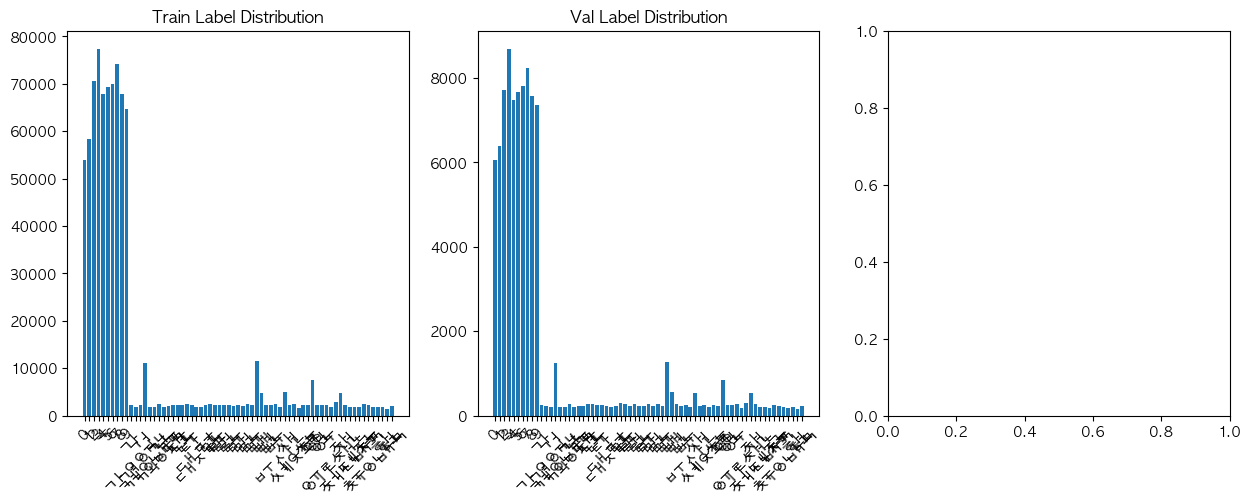

In [143]:
# split the label to characters
# take first 10 data to count the label distribution
from jamo import h2j, j2hcj, j2h


def split_label(label):
    k_tmp = []
    split_label = []
    for i in label:
        if i.isdigit():
            if len(k_tmp) > 0:
                split_label.append(''.join(k_tmp))
                k_tmp = []
            split_label.append(i)
        else:
            k_tmp.append(i)
    return split_label


# for label in train_labels[:10]:
#     print(split_label(h2j(label)))
# # count the label distribution in train and val

def count_label_distribution(labels):
    label_count = {}
    for label in labels:
        sl = split_label(h2j(label))
        for char in sl:
            if char in label_count:
                label_count[char] += 1
            else:
                label_count[char] = 1
    return label_count


train_label_count = count_label_distribution(train_labels)
val_label_count = count_label_distribution(val_labels)

# # sort it by value
# train_label_count = dict(sorted(train_label_count.items(), key=lambda x: x[1], reverse=True))
# val_label_count = dict(sorted(val_label_count.items(), key=lambda x: x[1], reverse=True))

# sort it by key
train_label_count = dict(sorted(train_label_count.items(), key=lambda x: x[0]))
val_label_count = dict(sorted(val_label_count.items(), key=lambda x: x[0]))


import matplotlib.pyplot as plt

# show korean characters
plt.rcParams['font.family'] = 'AppleGothic'

# # plot the label distribution
# plt.figure()
# plt.bar(train_label_count.keys(), train_label_count.values())
# plt.xticks(rotation=45)
# plt.title("Train Label Distribution")
# plt.show()

# plt.figure()
# plt.bar(val_label_count.keys(), val_label_count.values())
# plt.xticks(rotation=45)
# plt.title("Val Label Distribution")
# plt.show()

# calculate the cosine similarity between train and val character distribution
from sklearn.metrics.pairwise import cosine_similarity

# show distribution of val and train with cosine similarity matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar(train_label_count.keys(), train_label_count.values())
plt.xticks(rotation=45)
plt.title("Train Label Distribution")

plt.subplot(1, 3, 2)
plt.bar(val_label_count.keys(), val_label_count.values())
plt.xticks(rotation=45)
plt.title("Val Label Distribution")

plt.subplot(1, 3, 3)
# calculate the matrix of via pandas
import pandas as pd

# normalize the count to 0-1
train_label_count = {k: v / sum(train_label_count.values()) for k, v in train_label_count.items()}
val_label_count = {k: v / sum(val_label_count.values()) for k, v in val_label_count.items()}


# show two distribution with cosine similarity
train_label_count = pd.Series(train_label_count)
val_label_count = pd.Series(val_label_count)

# merge the two series to a dataframe
df = pd.DataFrame([train_label_count, val_label_count])
df = df.fillna(0)

print(df)

save_path = "label_distribution.csv"
df.to_csv(save_path)


# cacluate the cosine similarity
cosine_similarity = cosine_similarity(train_label_count.T, val_label_count.T)

# cacluate the Pearson correlation coefficient
from scipy.stats import pearsonr

# calculate the cosine similarity
cosine_similarity = cosine_similarity(train_label_count.T, val_label_count.T)
cosine_similarity = cosine_similarity[0][0]

# calculate the Pearson correlation coefficient
pearson_corr, _ = pearsonr(list(train_label_count[0]), list(val_label_count[0]))
print("Cosine Similarity: ", cosine_similarity)
print("Pearson Correlation Coefficient: ", pearson_corr)



plt.title("Cosine Similarity")
plt.show()